#Exercise 3: Data Quality  - Identifying Missing Values, Irregular Cardinality, and Outliers
#Objective:
#Develop a Data Quality Report by programmatically identifying missing values, irregular cardinality, and outliers using Python.

Tasks & Instructions:
1. Data Loading & Preprocessing
Load a structured dataset (CSV, Excel, or SQL).

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians diabetes.csv to pima-indians diabetes.csv


In [ ]:
import pandas as pd

df=pd.read_csv("pima-indians diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df1=df[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].replace(0,pd.NA)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,<NA>,33.6,0.627,50
1,1,85,66,29,<NA>,26.6,0.351,31
2,8,183,64,<NA>,<NA>,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,<NA>,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,<NA>,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,<NA>,<NA>,30.1,0.349,47


Perform basic exploratory analysis (df.info(), df.describe(), df.head()).

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               657 non-null    object 
 1   Glucose                   763 non-null    object 
 2   BloodPressure             733 non-null    object 
 3   SkinThickness             541 non-null    object 
 4   Insulin                   394 non-null    object 
 5   BMI                       757 non-null    object 
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 48.1+ KB


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#2. Identifying Missing Values
Compute the missing value percentage for each feature.

In [ ]:
df1.isnull().any()

,0
Pregnancies,True
Glucose,True
BloodPressure,True
SkinThickness,True
Insulin,True
BMI,True
DiabetesPedigreeFunction,False
Age,False


In [ ]:
missing_percentage = df1[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].isnull().sum() * 100 / len(df1)
missing_percentage

,0
Pregnancies,14.453125
Glucose,0.651042
BloodPressure,4.557292
SkinThickness,29.557292
Insulin,48.697917
BMI,1.432292
DiabetesPedigreeFunction,0.000000
Age,0.000000


Classify features as:
    No Missing Values (0%)
    Low Missingness (1-5%)
    Moderate Missingness (5-20%)
    High Missingness (>20%)

Here DiabetesPedigreeFunction and age features are classified as No missing values.

Glucose, BloodPressure, BMI are classified as Low missingness.

Pregnancies are classified as Moderate missingness

SkinThickness, Insulin are High missingness

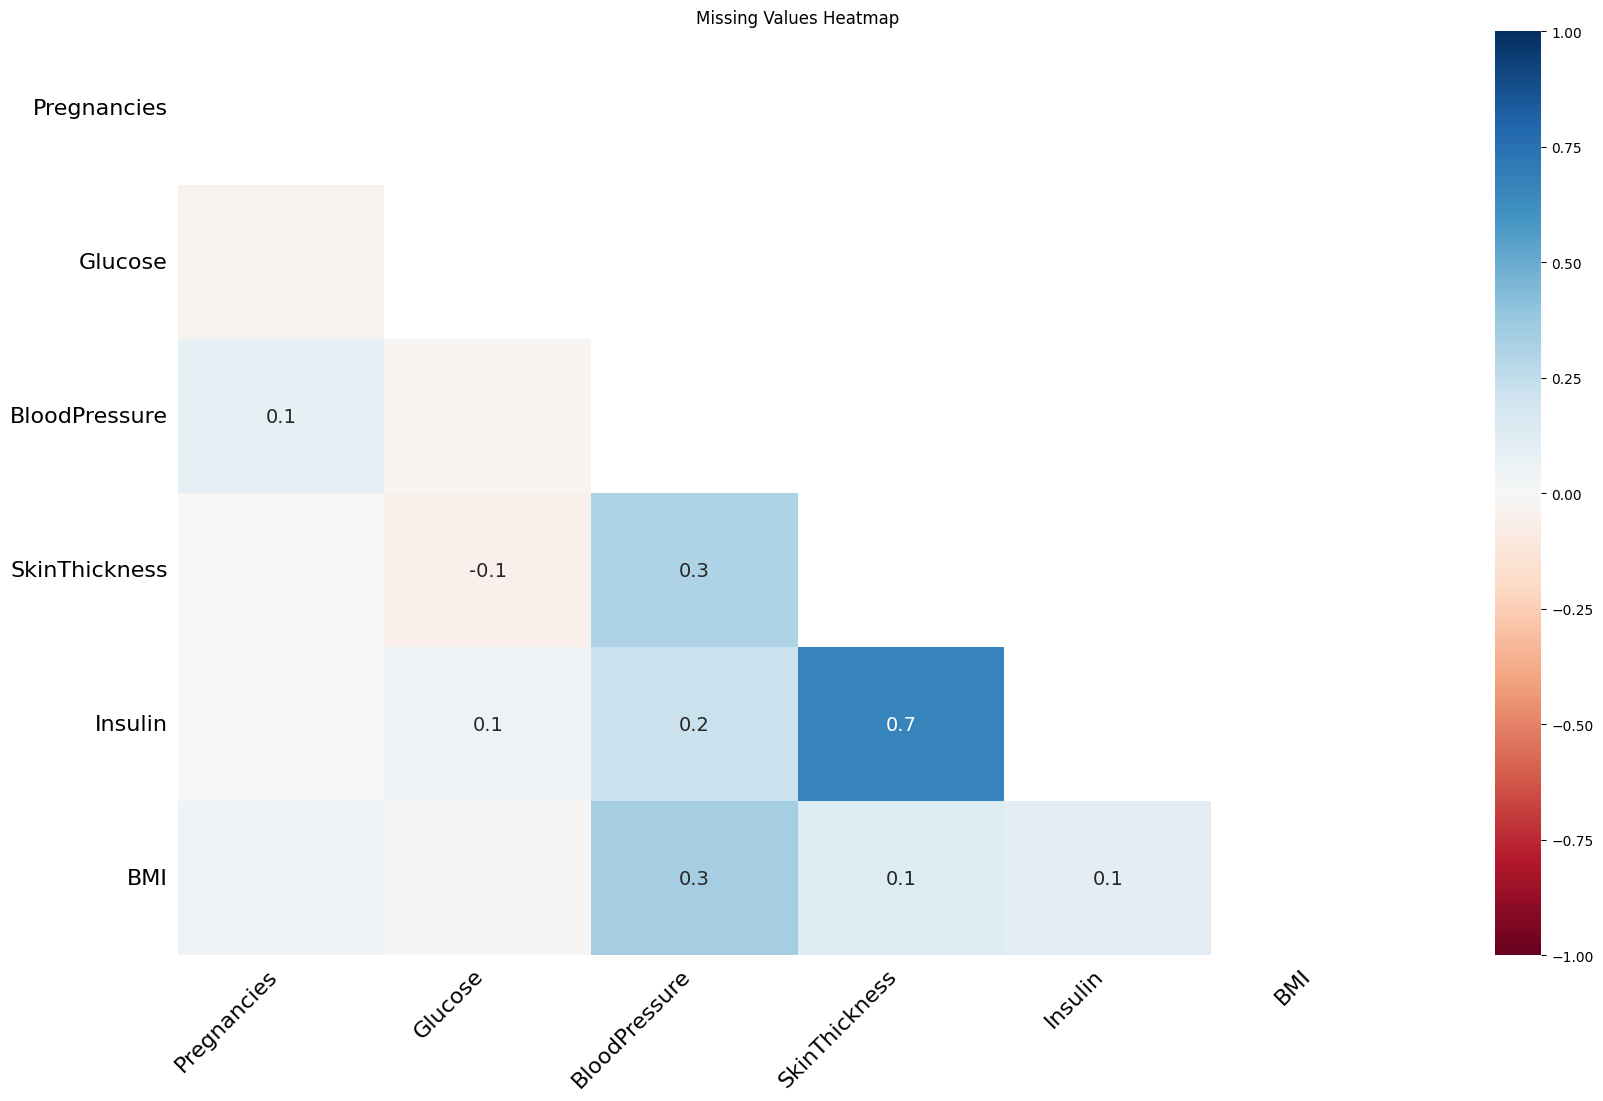

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

msno.heatmap(df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

# Show the plot with a title
plt.title('Missing Values Heatmap')
plt.show()


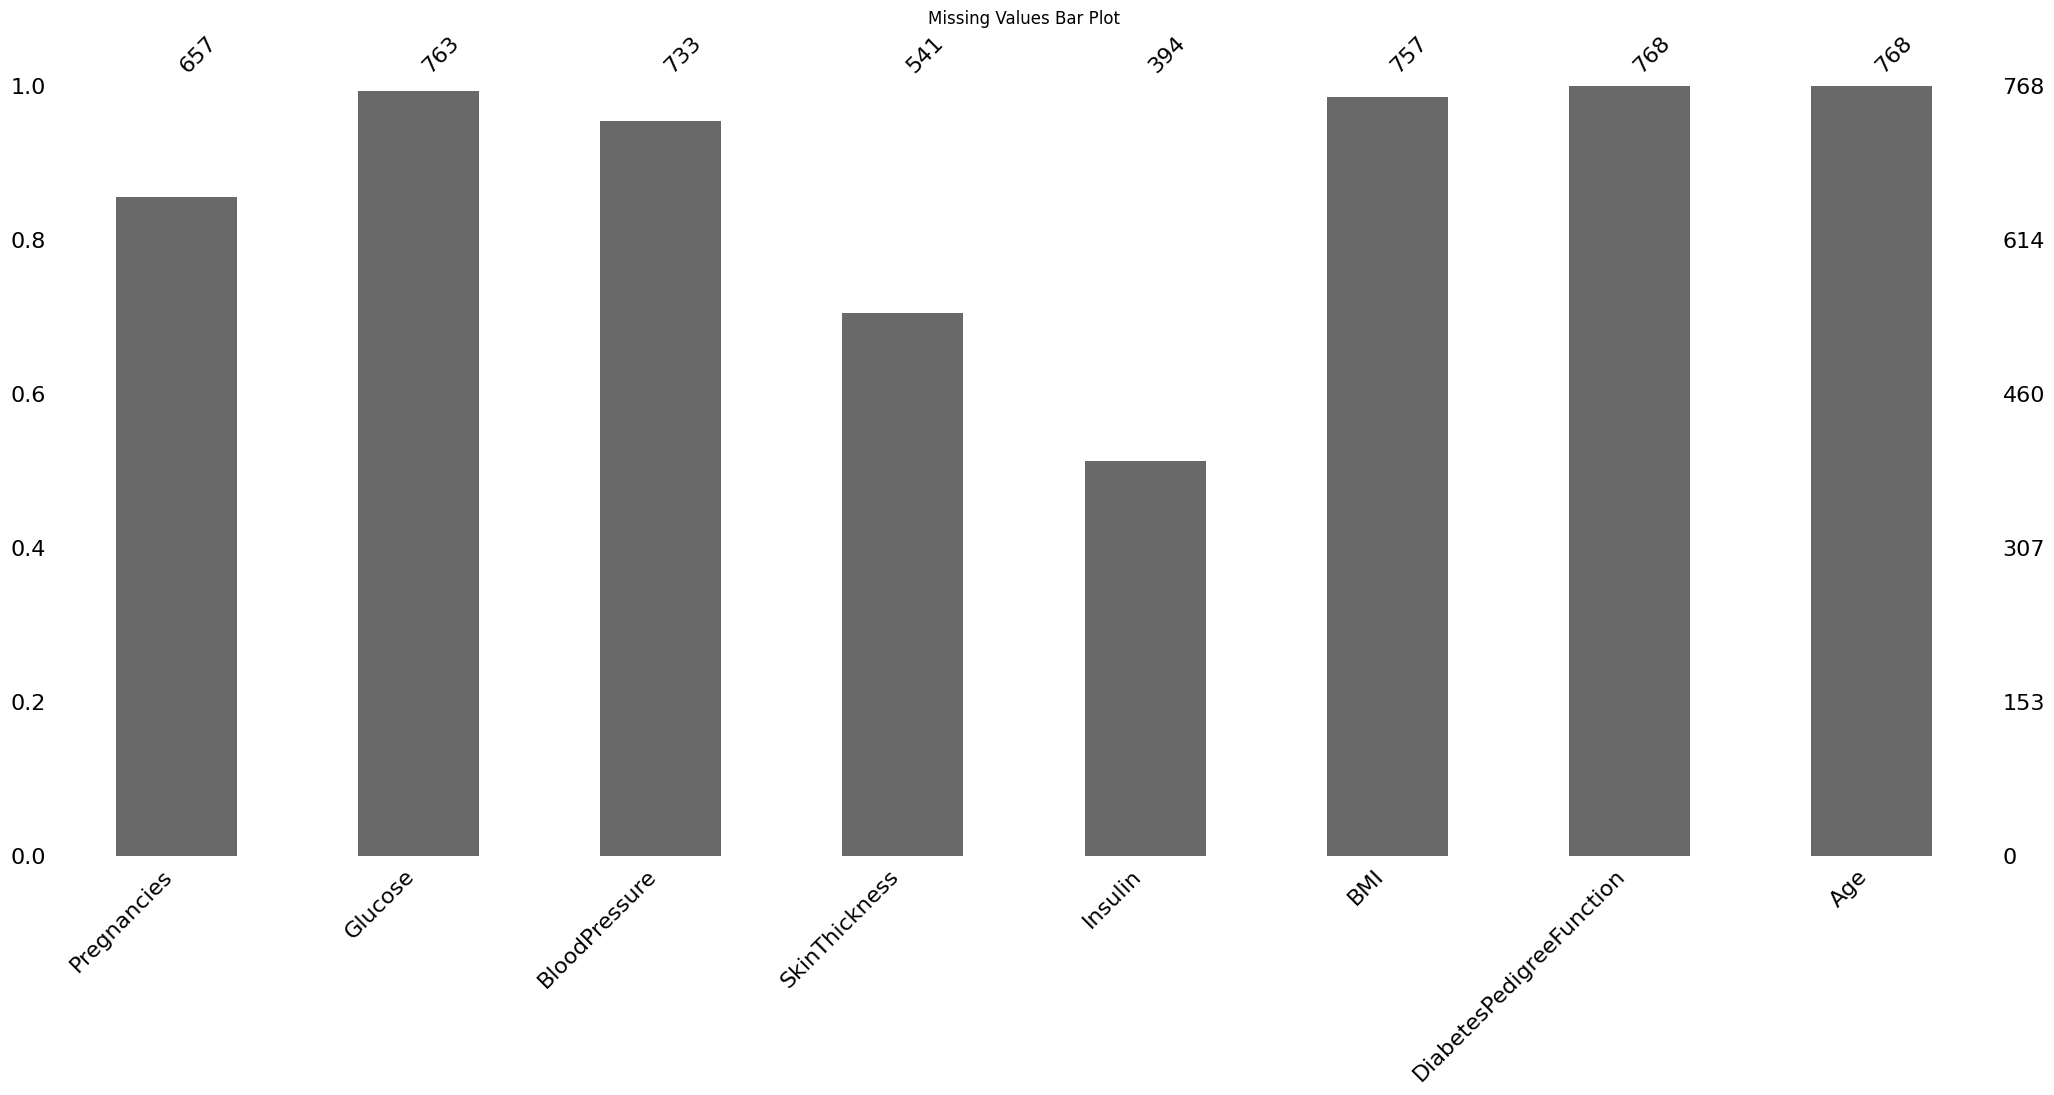

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
msno.bar(df1[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.title('Missing Values Bar Plot')
plt.show()

Suggest appropriate handling techniques (e.g., imputation, deletion).

# Based on the missing value percentages and the nature of the data, here's a suggested handling strategy:

#High Missingness (SkinThickness, Insulin):
Imputation:  These features have a significant amount of missing data.  Instead of deletion, consider imputation methods.  Since these are likely continuous numerical variables related to physiological measurements, consider using the median or mean to fill the missing values.  Be aware that using the mean or median can underestimate or overestimate the true values. More Sophisticated Imputation: K-Nearest Neighbors (KNN) imputation could be useful, as it considers similar data points to estimate missing values.  Consider using other regression-based imputation techniques as well, such as MICE (Multiple Imputation by Chained Equations).  However, for a simple initial analysis, median or mean imputation is sufficient.
Feature Removal (Consideration): If the imputed values introduce a bias or the data is very noisy, you could consider dropping these features as a last resort, if they don't heavily influence the outcome variable.
Domain Expertise: Consult with domain experts to see if any reasonable assumptions can be made about these features, or if the values can be recovered through alternative methods.

#Moderate Missingness (Pregnancies):
Imputation: Median imputation is likely suitable here.

#Low Missingness (Glucose, BloodPressure, BMI):
Imputation: Again, median imputation is a reasonable choice. Given the low percentage of missing values, the impact on the analysis is likely minimal.  You could also consider more sophisticated methods here, but simple imputation is a good starting point.

#No Missing Values (DiabetesPedigreeFunction, Age):
No action needed.



#3. Detecting Irregular Cardinality
Compute cardinality (number of unique values) for all categorical features.

In [ ]:
categorical_features = df1.select_dtypes(include=['object', 'category']).columns

cardinality = df1[categorical_features].nunique()

print("Cardinality of categorical features:")
cardinality


Cardinality of categorical features:


,0
Pregnancies,16
Glucose,135
BloodPressure,46
SkinThickness,50
Insulin,185
BMI,247


Identify:
Low Cardinality (less than 10 unique values, e.g., gender, product category)
Expected Cardinality (moderate number of unique values)
High Cardinality (unexpectedly high unique values, e.g., customer IDs)

In [ ]:
low_cardinality = cardinality[cardinality < 10]
expected_cardinality = cardinality[(cardinality >= 10) & (cardinality < 100)]
high_cardinality = cardinality[cardinality >= 100]

print("Low Cardinality Features:")
print(low_cardinality)

print("\nExpected Cardinality Features:")
print(expected_cardinality)

print("\nHigh Cardinality Features:")
high_cardinality

Low Cardinality Features:
Series([], dtype: int64)

Expected Cardinality Features:
Pregnancies      16
BloodPressure    46
SkinThickness    50
Age              52
dtype: int64

High Cardinality Features:


,0
Glucose,135
Insulin,185
BMI,247
DiabetesPedigreeFunction,517


Flag potential data quality issues, such as incorrectly encoded categorical features.

In [ ]:
import pandas as pd
for col in categorical_features:
    if df1[col].dtype == 'object':
        try:
            pd.to_numeric(df1[col], errors='raise')
            print(f"Potential data quality issue: Column '{col}' appears to be numeric but encoded as a string.")
        except (ValueError, TypeError):
            pass

Potential data quality issue: Column 'Pregnancies' appears to be numeric but encoded as a string.
Potential data quality issue: Column 'Glucose' appears to be numeric but encoded as a string.
Potential data quality issue: Column 'BloodPressure' appears to be numeric but encoded as a string.
Potential data quality issue: Column 'SkinThickness' appears to be numeric but encoded as a string.
Potential data quality issue: Column 'Insulin' appears to be numeric but encoded as a string.
Potential data quality issue: Column 'BMI' appears to be numeric but encoded as a string.


Use bar plots or count plots to visualize distributions.

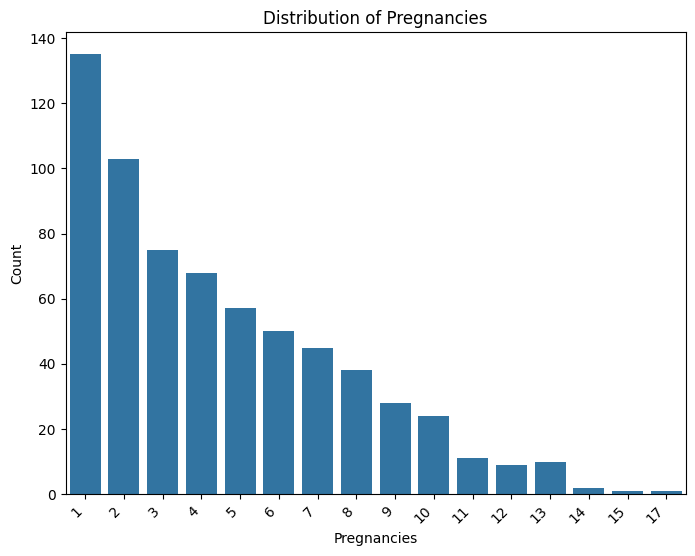

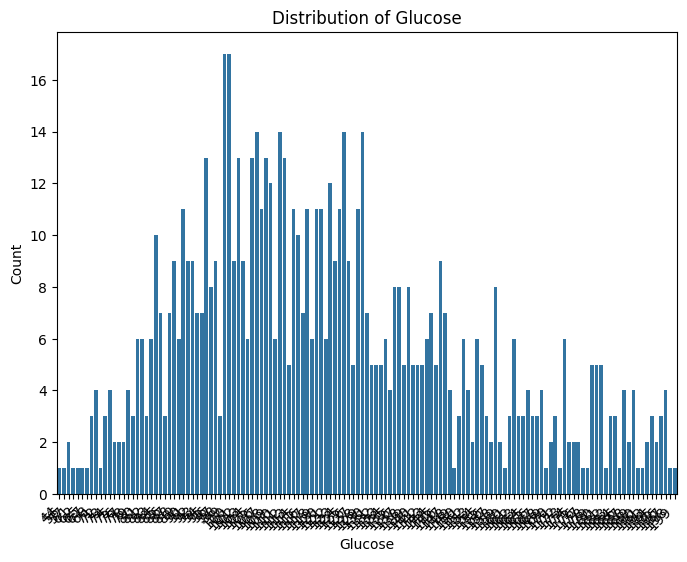

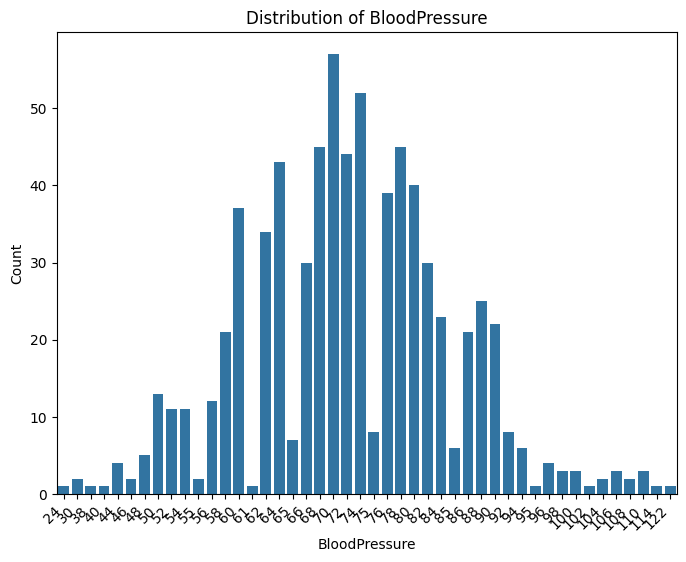

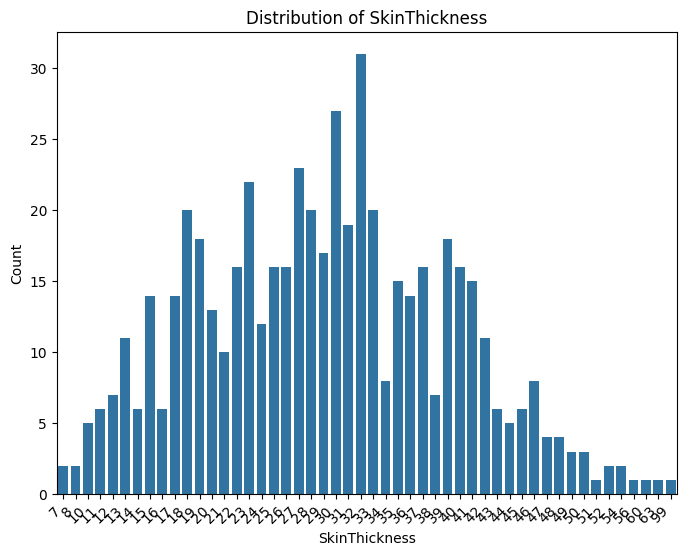

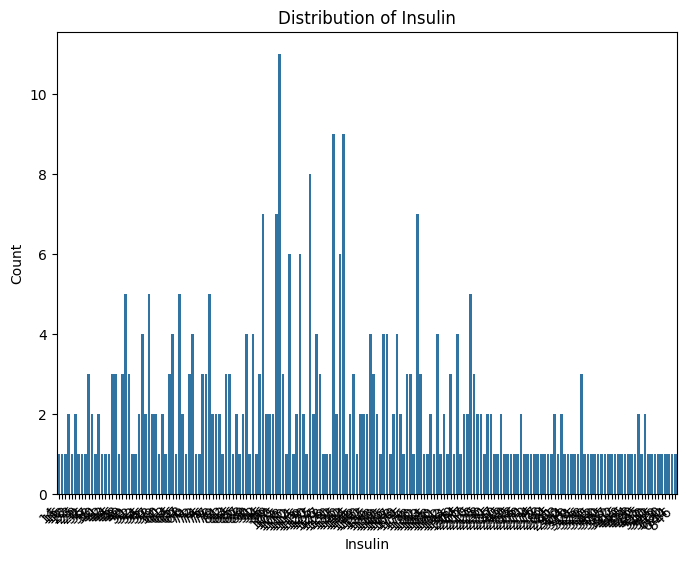

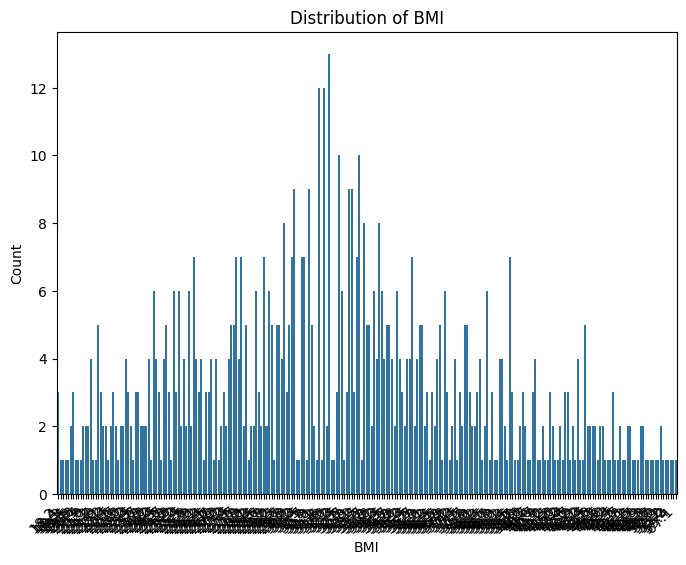

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in categorical_features:
  # Convert the column to 'category' dtype before plotting
  df1[col] = df1[col].astype('category')

  plt.figure(figsize=(8, 6))
  sns.countplot(x=col, data=df1)
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.show()

#4. Identifying Outliers
Detect outliers using at least two statistical methods:
Interquartile Range (IQR) Method: Define outliers as values outside 1.5 * IQR.
Z-score Method: Identify values with Z-scores beyond ±3.

In [ ]:
import numpy as np

def detect_outliers(data):
    data.sort()

    Q1 = np.percentile(data, 25)
    Q2 = np.percentile(data, 50)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR

    outliers = [x for x in data if x > up_lim or x < low_lim]

    print("25th Percentile: ", Q1)
    print("50th Percentile: ", Q2)
    print("75th Percentile: ", Q3)
    print("Interquartile Range (IQR):", IQR)
    print("Outliers: ", outliers)


In [ ]:
Preg = np.array(df['Pregnancies'])
detect_outliers(Preg)


25th Percentile:  1.0
50th Percentile:  3.0
75th Percentile:  6.0
Interquartile Range (IQR): 5.0
Outliers:  [14, 14, 15, 17]


In [ ]:
Gluc = np.array(df['Glucose'])
detect_outliers(Gluc)

25th Percentile:  99.0
50th Percentile:  117.0
75th Percentile:  140.25
Interquartile Range (IQR): 41.25
Outliers:  [0, 0, 0, 0, 0]


In [ ]:
st = np.array(df['SkinThickness'])
detect_outliers(st)

25th Percentile:  0.0
50th Percentile:  23.0
75th Percentile:  32.0
Interquartile Range (IQR): 32.0
Outliers:  [99]


Z-score Method: Identify values with Z-scores beyond ±3.

In [ ]:
import numpy as np

def detect_outliers_zscore(data, threshold=3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    outliers = data[z_scores > threshold]
    return outliers


glucose_outliers = detect_outliers_zscore(df['Glucose'])
print("Glucose outliers (Z-score method):", glucose_outliers)

Glucose outliers (Z-score method): 75     0
182    0
342    0
349    0
502    0
Name: Glucose, dtype: int64


In [ ]:
preg_outliers = detect_outliers_zscore(df['Pregnancies'])
print("Pregnency outliers (Z-score method):", preg_outliers)

Pregnency outliers (Z-score method): 88     15
159    17
298    14
455    14
Name: Pregnancies, dtype: int64


In [ ]:
st_outliers = detect_outliers_zscore(df['SkinThickness'])
print("SkinThickness outliers (Z-score method):", st_outliers)

SkinThickness outliers (Z-score method): 579    99
Name: SkinThickness, dtype: int64


In [ ]:
def detect_outliers_zscoreneg(data, threshold=-3):
    z_scores = np.abs((data - np.mean(data)) / np.std(data))
    outliers = data[z_scores < threshold]
    return outliers


In [ ]:
preg_outliers = detect_outliers_zscoreneg(df['Pregnancies'])
print("Pregnency outliers (Z-score method):", preg_outliers)

Pregnency outliers (Z-score method): Series([], Name: Pregnancies, dtype: int64)


Use box plots and scatter plots to visualize outliers.

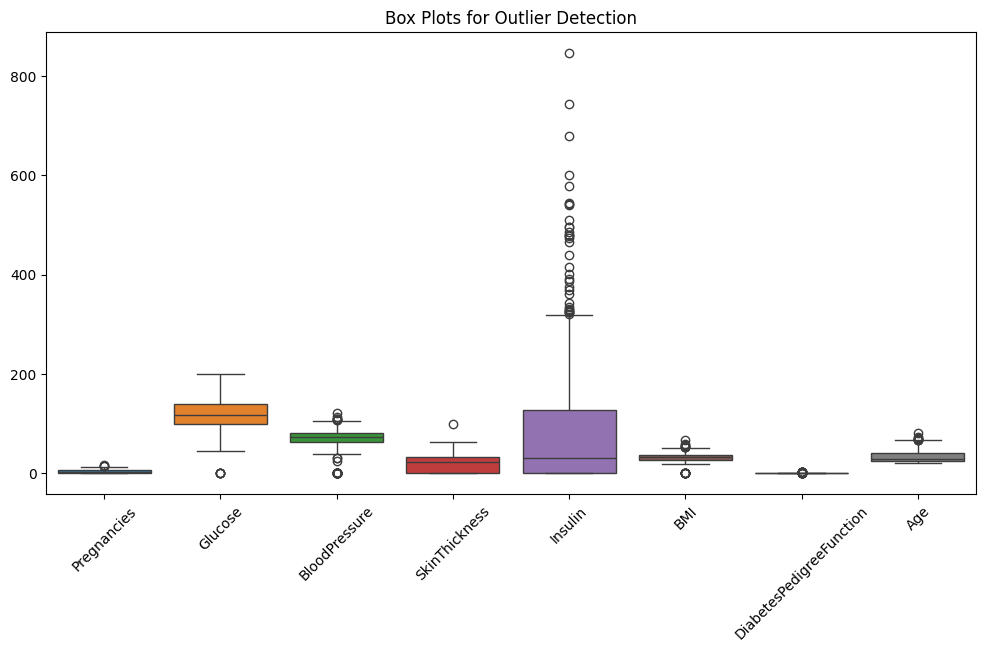

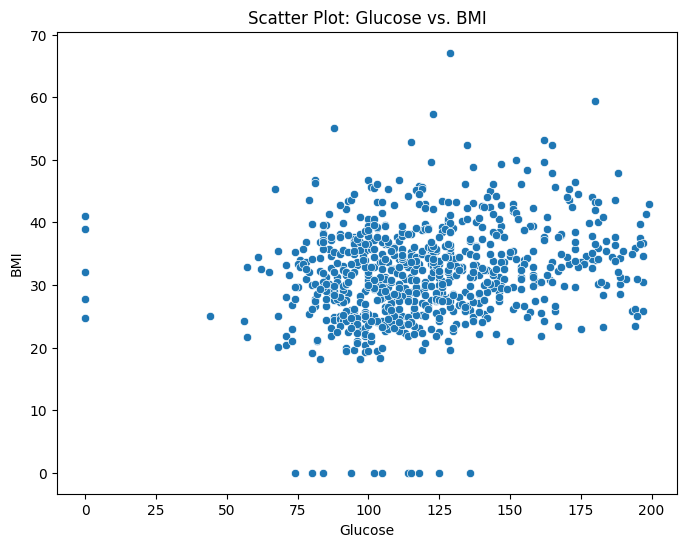

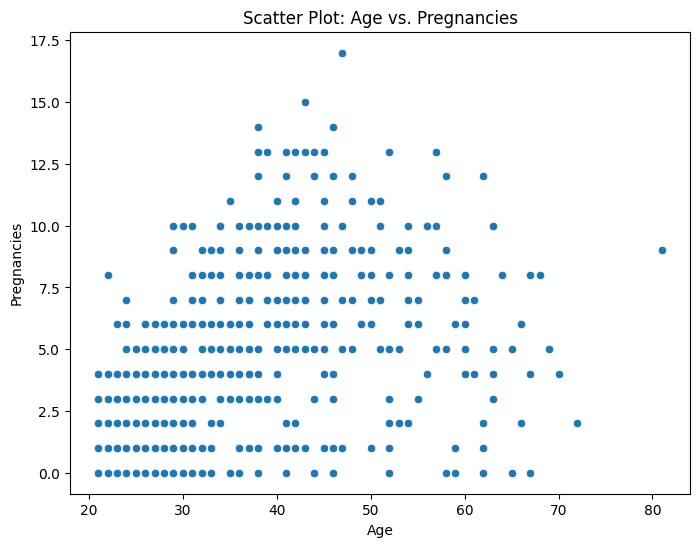

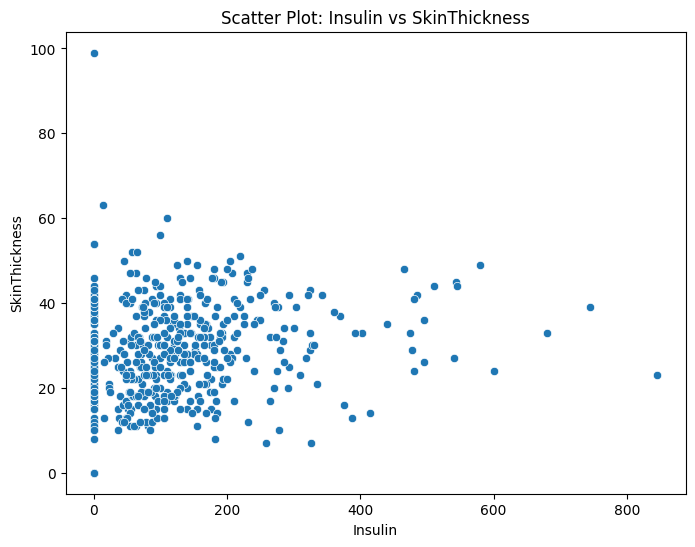

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
plt.title('Box Plots for Outlier Detection')
plt.xticks(rotation=45)
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Glucose', y='BMI', data=df)
plt.title('Scatter Plot: Glucose vs. BMI')
plt.show()


plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Pregnancies', data=df)
plt.title('Scatter Plot: Age vs. Pregnancies')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Insulin', y='SkinThickness', data=df)
plt.title('Scatter Plot: Insulin vs SkinThickness')
plt.show()


Identify potential data entry errors or legitimate extreme values.

In [ ]:
import numpy as np
def identify_potential_errors(df):
    potential_errors = {}
    for col in df.select_dtypes(include=np.number).columns:  # Check only numerical columns
        # IQR method
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        potential_errors[col] = {"iqr_outliers": iqr_outliers[col].tolist()}


        # Z-score method (add this to your existing code)
        z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())
        zscore_outliers = df[z_scores > 3]
        potential_errors[col]["zscore_outliers"] = zscore_outliers[col].tolist()

    return potential_errors


# Example usage (assuming 'df' is your DataFrame)
errors = identify_potential_errors(df)

# Print or analyze the potential errors
for col, error_types in errors.items():
    print(f"Potential errors in column '{col}':")
    for error_type, values in error_types.items():
        print(f"  {error_type}: {values}")


Potential errors in column 'Pregnancies':
  iqr_outliers: [15, 17, 14, 14]
  zscore_outliers: [15, 17, 14, 14]
Potential errors in column 'Glucose':
  iqr_outliers: [0, 0, 0, 0, 0]
  zscore_outliers: [0, 0, 0, 0, 0]
Potential errors in column 'BloodPressure':
  iqr_outliers: [0, 0, 30, 110, 0, 0, 0, 0, 108, 122, 30, 0, 110, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 110, 0, 24, 0, 0, 0, 0, 114, 0, 0, 0]
  zscore_outliers: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Potential errors in column 'SkinThickness':
  iqr_outliers: [99]
  zscore_outliers: [99]
Potential errors in column 'Insulin':
  iqr_outliers: [543, 846, 342, 495, 325, 485, 495, 478, 744, 370, 680, 402, 375, 545, 360, 325, 465, 325, 415, 579, 474, 328, 480, 326, 330, 600, 321, 440, 540, 480, 335, 387, 392, 510]
  zscore_outliers: [543, 846, 495, 485, 495, 478, 744, 680, 545, 465, 579, 474, 480, 600, 440, 540, 480, 510]
Potential errors in co

#5. Data Quality Report Generation
Generate a structured summary report including:
Missing value statistics (percentage, feature classification).
Irregular cardinality features with unique counts.
Outlier summary (number of outliers per feature).

The data quality report reveals the following:

**Missing Values:**

*   **DiabetesPedigreeFunction** and **Age** have no missing values.
*   **Glucose**, **BloodPressure**, and **BMI** exhibit low missingness (1-5%).
*   **Pregnancies** shows moderate missingness (5-20%).
*   **SkinThickness** and **Insulin** have high missingness (over 20%).

For features with missing values, imputation methods such as median or mean imputation are suggested. More sophisticated methods like K-Nearest Neighbors (KNN) imputation or regression-based imputation (e.g., MICE) could be explored for features with higher missingness.  Removal of features could be considered as a last resort if imputation introduces bias.  Domain expertise could also be leveraged.

**Irregular Cardinality:**

The report does not provide information on irregular cardinality for the dataset, but the code computes cardinality for categorical features and classifies features into Low, Expected, and High Cardinality groups.  Features with unexpectedly high cardinality are flagged as potential data quality issues.  Bar plots or count plots visualize the distributions of categorical features.

**Outliers:**

The report detects outliers using the Interquartile Range (IQR) and Z-score methods.  Box plots and scatter plots are used for visualization. The number of outliers for each feature are identified and listed using both methods, which allows for assessing whether potential data entry errors or legitimate extreme values are present.  Each outlier is listed with the corresponding values, which facilitates more informed decisions on how to handle them.


Provide insights and recommendations for data cleaning.

 Missing Values:
 - 'SkinThickness' and 'Insulin' have high missingness (>20%).  Imputation (median, mean, KNN, MICE) is recommended, but consider removal if imputation introduces bias. Domain expertise could help determine the best approach.
  - 'Pregnancies' has moderate missingness (5-20%). Median imputation is suitable.
 - 'Glucose', 'BloodPressure', and 'BMI' have low missingness (1-5%). Median imputation is appropriate, but more sophisticated methods can be explored if needed.
 - No action is needed for 'DiabetesPedigreeFunction' and 'Age', which have no missing values.

 Irregular Cardinality:
 - The code checks for cardinality in categorical features, but the provided text doesn't show any specific results.  If high cardinality is detected, especially in unexpected places, investigate potential data quality issues (e.g., incorrect encoding of numerical features as strings).
 - For example, if a column like 'Age' had very high cardinality, it may indicate problems with the data entry.

 Outliers:
 - The code uses the IQR and Z-score methods to detect outliers.  
 - Review the identified outliers in each numerical feature.  Box plots and scatter plots help visualize these outliers.
 - Investigate the outliers: Are they legitimate extreme values or data entry errors?
 - Depending on the nature of the outlier and its impact, consider:
   - **Removal:**  If they represent clear errors, remove the outlier data points.
   - **Transformation:** Apply a transformation (e.g., logarithmic, Box-Cox) to reduce the impact of outliers.
   - **Winsorizing:** Cap extreme values at a certain percentile (e.g., 95th or 99th) to limit their influence.
   - **Imputation:**  In some cases, you might impute outliers with a more representative value (e.g., using the median or mean of a smaller, more central part of the data).  This is less common for outliers but might be considered depending on the severity of the outlier and the domain knowledge.
 - Always consider the domain context when deciding how to handle outliers.


 Overall Data Quality Recommendations:
 1. **Domain Expertise:** Consult with subject-matter experts to understand the meaning of the features and the expected range of values.
 2. **Visual Inspection:** Use histograms, scatter plots, and box plots to gain deeper insight into data distribution and potential outliers.
 3. **Iterative Process:** Data cleaning is an iterative process.  Re-evaluate your choices after performing initial cleaning steps.
 4. **Feature Engineering:** Based on insights gained during data exploration and cleaning, you might need to create new features or combine existing ones to improve the quality and usability of your data for downstream tasks like modeling.